# Предварительный анализ данных
## Определение размера входного датасета

In [6]:
import os

def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0
def file_size(file_path):
    """
    this function will return the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)
    
file_path = r"expenditure_csv.csv"
print (file_size(file_path))

148.0 KB


## Загрузка необходимых библиотек

In [7]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn. preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('ggplot')

#### Загрузка исследуемых данных

In [8]:
df=pd.read_csv('expenditure_csv.csv', header=0)

#### Вывод первых и последних строк датафрейма

In [9]:
df.head()

,LOCATION,Country,TIME,Business enterprise,Government,Higher Education,Private non-profit,Rest of the world,Not specified source,Basic research,Applied research,Experimental development,Not specified activities,Medical and health sciences
0,ALB,Albania,2007,2.930940e+02,1.506861e+04,1282.00667,NaN,2273.15668,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,Albania,2008,1.218547e+03,3.020112e+04,3202.33312,NaN,2753.51278,NaN,10278.21016,19958.36723,7138.93631,NaN,NaN
2,ARE,United Arab Emirates,2014,3.157091e+06,1.092839e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,Argentina,1996,NaN,NaN,NaN,NaN,NaN,NaN,447599.43396,790068.75176,355212.36218,NaN,NaN
4,ARG,Argentina,1997,4.790537e+05,1.153081e+06,29224.56816,38536.31782,60454.74394,NaN,454170.41829,876654.52833,429525.51187,NaN,NaN


In [10]:
df.tail()

,LOCATION,Country,TIME,Business enterprise,Government,Higher Education,Private non-profit,Rest of the world,Not specified source,Basic research,Applied research,Experimental development,Not specified activities,Medical and health sciences
1326,ZAF,South Africa,2010,1.777157e+06,1.971883e+06,2389.29391,142279.30373,534575.86983,NaN,1.060027e+06,1.761973e+06,1.606285e+06,NaN,756778.23539
1327,ZAF,South Africa,2011,1.814666e+06,2.002941e+06,6532.76151,130392.76347,697641.19919,NaN,1.139428e+06,1.966568e+06,1.546178e+06,NaN,800006.15978
1328,ZAF,South Africa,2012,1.854363e+06,2.194731e+06,37304.10127,118772.12020,631555.34871,NaN,1.221951e+06,2.241810e+06,1.372965e+06,NaN,832279.74353
1329,ZAF,South Africa,2013,2.050618e+06,2.126181e+06,35130.68555,104404.01880,640385.09733,NaN,1.178708e+06,2.343516e+06,1.434495e+06,NaN,901773.74729
1330,ZMB,Zambia,2008,3.252066e+03,9.554834e+04,NaN,324.99069,1630.89182,NaN,NaN,NaN,NaN,NaN,NaN


#### Размер датасета

In [11]:
df.shape

(1331, 14)

#### Определение типов признаков и количества столбцов каждого типа

In [12]:
pd.options.display.max_rows = 65

dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,LOCATION,object
1,Country,object
2,TIME,int64
3,Business enterprise,float64
4,Government,float64
5,Higher Education,float64
6,Private non-profit,float64
7,Rest of the world,float64
8,Not specified source,float64
9,Basic research,float64


In [13]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,11
2,object,2


#### Функция для вычисления пропущенных значений по столбцам

In [14]:
def missing_values_table(df):
        
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Датасет содержит " + str(df.shape[1]) + " признаков.\n"      
            "Из них " + str(mis_val_table_ren_columns.shape[0]) +
              " имеют пропущенные значения.")
        
        return mis_val_table_ren_columns

In [15]:
missing_values = missing_values_table(df)
missing_values

Датасет содержит 14 признаков.
Из них 11 имеют пропущенные значения.


,Missing Values,% of Total Values
Not specified activities,1167,87.7
Not specified source,1127,84.7
Medical and health sciences,732,55.0
Experimental development,680,51.1
Basic research,669,50.3
Applied research,658,49.4
Private non-profit,427,32.1
Higher Education,384,28.9
Rest of the world,194,14.6
Business enterprise,185,13.9


## Очистка данных

#### Заполнение пропущенных значений медианой

In [16]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('Заполнение недостающих значений для: {}'.format(col))
        
        med = df[col].median()
        df[col] = df[col].fillna(med)

Заполнение недостающих значений для: Business enterprise
Заполнение недостающих значений для: Government
Заполнение недостающих значений для: Higher Education
Заполнение недостающих значений для: Private non-profit
Заполнение недостающих значений для: Rest of the world
Заполнение недостающих значений для: Not specified source
Заполнение недостающих значений для: Basic research
Заполнение недостающих значений для: Applied research
Заполнение недостающих значений для: Experimental development
Заполнение недостающих значений для: Not specified activities
Заполнение недостающих значений для: Medical and health sciences


#### Проверка на пропуски

In [17]:
df.isnull().sum()

LOCATION                       0
Country                        0
TIME                           0
Business enterprise            0
Government                     0
Higher Education               0
Private non-profit             0
Rest of the world              0
Not specified source           0
Basic research                 0
Applied research               0
Experimental development       0
Not specified activities       0
Medical and health sciences    0
dtype: int64

## Описательный анализ данных

#### Описательные статистики для числовых полей

In [18]:
df.describe()

,TIME,Business enterprise,Government,Higher Education,Private non-profit,Rest of the world,Not specified source,Basic research,Applied research,Experimental development,Not specified activities,Medical and health sciences
count,1331.000000,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03
mean,2006.123216,9.165234e+06,4.459117e+06,3.776984e+05,2.572831e+05,5.468999e+05,2.121136e+04,1.044119e+06,1.746139e+06,4.247393e+06,2.329954e+05,1.716922e+05
std,5.458510,3.412622e+07,1.424384e+07,1.599080e+06,1.462899e+06,1.673106e+06,2.463360e+05,2.720583e+06,4.944574e+06,2.173649e+07,1.092393e+06,5.938039e+05
min,1996.000000,2.542250e+00,1.785972e+02,9.355100e+00,1.750460e+00,2.387420e+00,5.110000e-03,5.221224e+02,7.276912e+01,4.651638e+02,2.262000e-02,8.022944e+01
25%,2002.000000,1.136862e+05,1.166923e+05,1.111102e+04,3.963598e+03,2.357991e+04,6.616908e+03,2.915338e+05,3.856356e+05,3.496043e+05,7.217825e+04,4.528008e+04
50%,2007.000000,5.944523e+05,5.429247e+05,2.769224e+04,1.575403e+04,6.921768e+04,6.616908e+03,2.915338e+05,3.960281e+05,3.496043e+05,7.217825e+04,4.528008e+04
75%,2011.000000,3.144368e+06,2.132784e+06,1.068874e+05,4.541978e+04,3.414696e+05,6.616908e+03,2.915338e+05,4.166151e+05,3.496043e+05,7.217825e+04,4.528008e+04
max,2016.000000,3.226170e+08,1.343840e+08,1.712700e+07,1.878800e+07,2.406100e+07,7.468113e+06,2.090894e+07,4.418466e+07,3.446929e+08,1.539857e+07,8.648136e+06


#### Вычисление величины перекоса

In [19]:
df.skew() 

TIME                           -0.156441
Business enterprise             5.855628
Government                      6.311082
Higher Education                6.333137
Private non-profit              9.279645
Rest of the world               8.253714
Not specified source           26.098113
Basic research                  4.460322
Applied research                4.634242
Experimental development        9.878369
Not specified activities        8.722720
Medical and health sciences     8.527098
dtype: float64

#### Построение графиков распределений

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



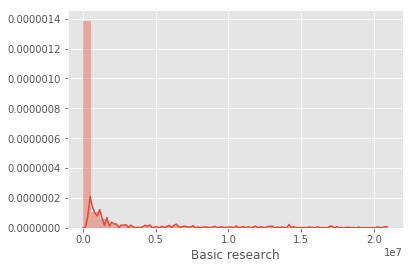

In [20]:
sns.distplot(df['Basic research'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



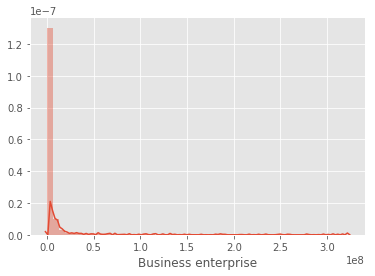

In [21]:
sns.distplot(df['Business enterprise'])

#### Построение таблицы корреляции

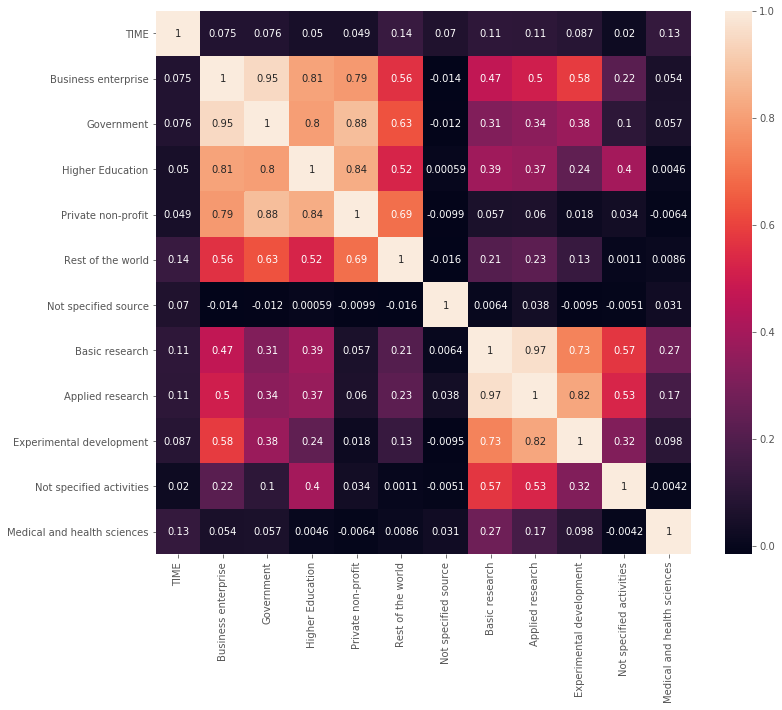

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

#### Перевод категориальных данных в числовые

In [23]:
le=LabelEncoder()
le.fit(df.Country)
df['Country']=le.transform(df.Country)

In [24]:
le.fit(df.LOCATION)
df['LOCATION']=le.transform(df.LOCATION)

## Алгоритм РСА

#### Запись датасета в переменную Х

In [26]:
X=df.values
X.shape

(1331, 14)

#### Стандартизация данных

In [27]:
scaler = StandardScaler()
scaler. fit(X)
X_scaled = scaler. transform(X)

#### Применение РСА для исходного числа признаков, чтобы определить насколько хорошо алгоритм улавливает дисперсию данных

In [28]:
pca_14 = PCA(n_components=14, random_state=2020)
pca_14.fit(X_scaled)
X_pca_14 = pca_14.transform(X_scaled)

In [29]:
print("Дисперсия, объяснённая всеми 14 главными компонентами =",
    sum(pca_14.explained_variance_ratio_ * 100))

Дисперсия, объяснённая всеми 14 главными компонентами = 99.99999999999997


In [30]:
pca_14.explained_variance_ratio_ * 100

array([34.65900418, 18.56819811, 12.43573749,  8.1665437 ,  7.05465123,
        6.24504645,  5.59815911,  3.81469614,  1.55025457,  0.77575064,
        0.68934979,  0.23805091,  0.12540052,  0.07915716])

#### Построение графика зависимости процента объяснённой дисперсии от количества компонентов

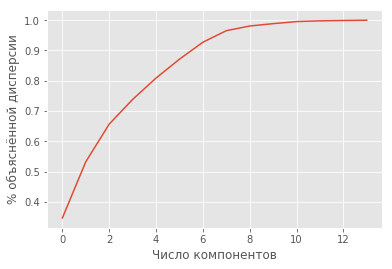

In [31]:
plt.plot(np.cumsum(pca_14.explained_variance_ratio_))
plt.xlabel('Число компонентов')
plt.ylabel('% объяснённой дисперсии')

In [32]:
print("Дисперсия, объяснённая первым главным компонентом =",
      np.cumsum(pca_14.explained_variance_ratio_ * 100)[0])
print("Дисперсия, объяснённая первыми двумя главными компонентами =",
      np.cumsum(pca_14.explained_variance_ratio_ * 100)[1])
print("Дисперсия, объяснённая первыми тремя главными компонентами =" ,
      np.cumsum(pca_14.explained_variance_ratio_ * 100)[2])
print("Дисперсия, объяснённая первыми восьмью главными компонентами =",
      np.cumsum(pca_14.explained_variance_ratio_*100)[7])

Дисперсия, объяснённая первым главным компонентом = 34.65900418445456
Дисперсия, объяснённая первыми двумя главными компонентами = 53.22720229248023
Дисперсия, объяснённая первыми тремя главными компонентами = 65.66293978039013
Дисперсия, объяснённая первыми восьмью главными компонентами = 96.54203641067573


#### РСА с сохранением 95% дисперсии

In [33]:
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

In [34]:
X_pca_95.shape

(1331, 8)

Text(0,0.5,'Преобразованные данные')

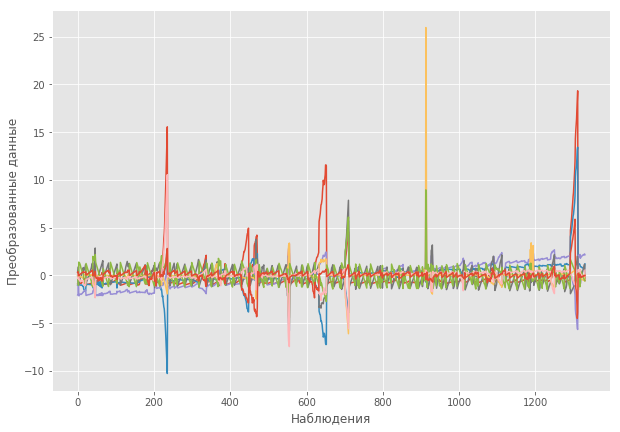

In [35]:
plt.figure(figsize=(10, 7))
plt.plot(X_pca_95)
plt.xlabel('Наблюдения')
plt.ylabel('Преобразованные данные')

#### Сохранение выходного датасета

In [36]:
df_new = pd.DataFrame(X_pca_95, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
"PC6", "PC7", "PC8"])

In [37]:
df_new.to_excel("expendeture95.xlsx", index = False)

#### Определение размера выходного датасета

In [38]:
import os

def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0
def file_size(file_path):
    """
    this function will return the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)
    
file_path = r"expendeture95.xlsx"
print (file_size(file_path))

143.1 KB


## РСА с удалением столбцов

In [39]:
df_drop=pd.read_csv('expenditure_csv.csv', header=0)

#### Определение пропущенных значений

In [40]:
def missing_values_table(df):
        
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Датасет содержит " + str(df.shape[1]) + " признаков.\n"      
            "Из них " + str(mis_val_table_ren_columns.shape[0]) +
              " имеют пропущенные значения.")
        
        return mis_val_table_ren_columns

In [41]:
missing_values = missing_values_table(df_drop)
missing_values

Датасет содержит 14 признаков.
Из них 11 имеют пропущенные значения.


,Missing Values,% of Total Values
Not specified activities,1167,87.7
Not specified source,1127,84.7
Medical and health sciences,732,55.0
Experimental development,680,51.1
Basic research,669,50.3
Applied research,658,49.4
Private non-profit,427,32.1
Higher Education,384,28.9
Rest of the world,194,14.6
Business enterprise,185,13.9


#### Определение количества уникальных значений по столбцам

In [42]:
df.nunique()

LOCATION                        124
Country                         124
TIME                             21
Business enterprise            1147
Government                     1253
Higher Education                947
Private non-profit              905
Rest of the world              1137
Not specified source            205
Basic research                  663
Applied research                673
Experimental development        651
Not specified activities        165
Medical and health sciences     599
dtype: int64

#### Удаление столбцов

In [43]:
df_drop = df_drop.drop(columns = ['Not specified activities','Not specified source','Country'])

#### Замена категориальных данных на числовые

In [44]:
le=LabelEncoder()
le.fit(df_drop.LOCATION)
df_drop['LOCATION']=le.transform(df_drop.LOCATION)

#### Заполнение отсутствующих значений

In [45]:
df_drop_numeric = df_drop.select_dtypes(include=[np.number])
numeric_cols = df_drop_numeric.columns.values
for col in numeric_cols:
    missing = df_drop[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('Заполнение недостающих значений для: {}'.format(col))
        
        med = df_drop[col].median()
        df_drop[col] = df_drop[col].fillna(med)

Заполнение недостающих значений для: Business enterprise
Заполнение недостающих значений для: Government
Заполнение недостающих значений для: Higher Education
Заполнение недостающих значений для: Private non-profit
Заполнение недостающих значений для: Rest of the world
Заполнение недостающих значений для: Basic research
Заполнение недостающих значений для: Applied research
Заполнение недостающих значений для: Experimental development
Заполнение недостающих значений для: Medical and health sciences


### Алгоритм РСА  

In [46]:
X_drop=df_drop.values
X_drop.shape

(1331, 11)

In [47]:
scaler. fit(X_drop)
X_drop_scaled = scaler. transform(X_drop)

In [48]:
from sklearn.decomposition import PCA
pca_11 = PCA(n_components=11, random_state=2020)
pca_11.fit(X_drop_scaled)
X_pca_11 = pca_11.transform(X_drop_scaled)

In [49]:
print("Дисперсия, объяснённая всеми 11 главными компонентами =",
    sum(pca_11.explained_variance_ratio_ * 100))

Дисперсия, объяснённая всеми 11 главными компонентами = 100.00000000000001


In [50]:
pca_11.explained_variance_ratio_ * 100

array([42.68722864, 20.83593099, 10.37416789,  8.8244205 ,  7.55173515,
        4.53127541,  3.6619877 ,  0.95350747,  0.30970512,  0.16684313,
        0.10319799])

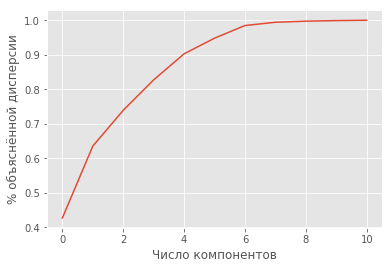

In [51]:
plt.plot(np.cumsum(pca_11.explained_variance_ratio_))
plt.xlabel('Число компонентов')
plt.ylabel('% объяснённой дисперсии')

In [52]:
print("Дисперсия, объяснённая первым главным компонентом =",
      np.cumsum(pca_11.explained_variance_ratio_ * 100)[0])
print("Дисперсия, объяснённая первыми двумя главными компонентами =",
      np.cumsum(pca_11.explained_variance_ratio_ * 100)[1])
print("Дисперсия, объяснённая первыми тремя главными компонентами =" ,
      np.cumsum(pca_11.explained_variance_ratio_ * 100)[2])
print("Дисперсия, объяснённая первыми шестью главными компонентами =",
      np.cumsum(pca_11.explained_variance_ratio_*100)[5])

Дисперсия, объяснённая первым главным компонентом = 42.68722864395495
Дисперсия, объяснённая первыми двумя главными компонентами = 63.523159634592844
Дисперсия, объяснённая первыми тремя главными компонентами = 73.89732752265714
Дисперсия, объяснённая первыми шестью главными компонентами = 94.80475858080148


In [53]:
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(X_drop_scaled)
X_drop_pca_95 = pca_95.transform(X_drop_scaled)

In [54]:
X_drop_pca_95.shape

(1331, 7)

Text(0,0.5,'Преобразованные данные')

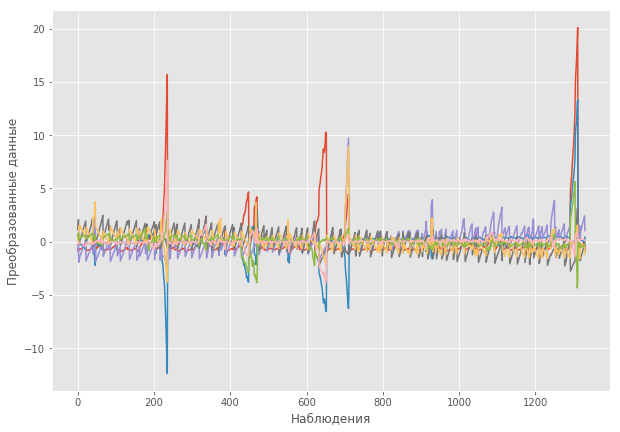

In [55]:
plt.figure(figsize=(10, 7))
plt.plot(X_drop_pca_95)
plt.xlabel('Наблюдения')
plt.ylabel('Преобразованные данные')

In [56]:
df_drop_new = pd.DataFrame(X_drop_pca_95, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
"PC6", "PC7"])

In [57]:
df_drop_new.to_excel("expendeture95_drop.xlsx", index=False)

#### Определение объёма выходного датасета

In [58]:
import os

def convert_bytes(num):
    """
    this function will convert bytes to MB.... GB... etc
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return "%3.1f %s" % (num, x)
        num /= 1024.0
def file_size(file_path):
    """
    this function will return the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)
    
file_path = r"expendeture95_drop.xlsx"
print (file_size(file_path))

126.9 KB
